<a href="https://colab.research.google.com/github/eckoecho/CodingDojo/blob/week-9/Week%209/Hierarchical_Clustering_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [3]:
wine = pd.read_csv('https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


# Scale Data

In [4]:
# Instantiate Standard Scaler
scaler = StandardScaler()
#Fit and transform the dataset
scaled_df = scaler.fit_transform(df)

# Visualize Dendrogram

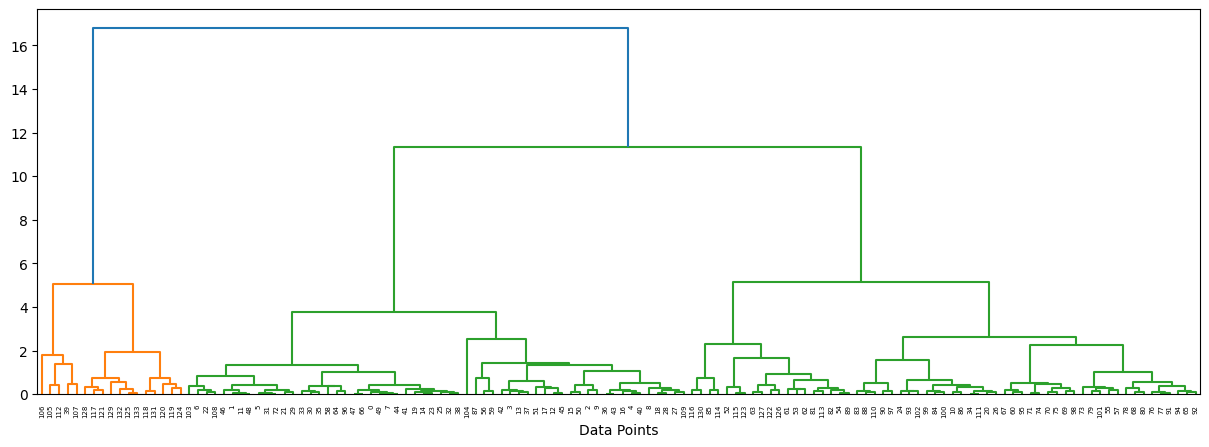

In [5]:
# Visualize Dendogram
plt.figure(figsize=(15,5))
sch.dendrogram(sch.linkage(scaled_df, method="ward"))
plt.xlabel("Data Points");

In [6]:
# Instantiate clustering
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(df)

AgglomerativeClustering()

# Trying Different Number of Clusters

<ipython-input-10-b0a53c5e92aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cluster'] = hc.labels_


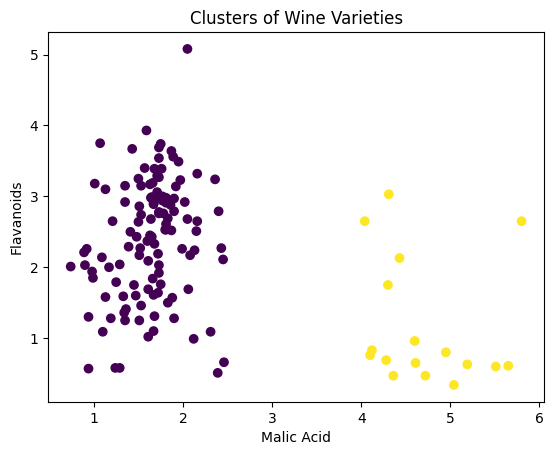

In [10]:
# Save the cluster lables to the dataframe
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

<ipython-input-11-09e52e8a201b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cluster"] = hc.labels_


Text(0.5, 1.0, 'Clusters of Wine Varities')

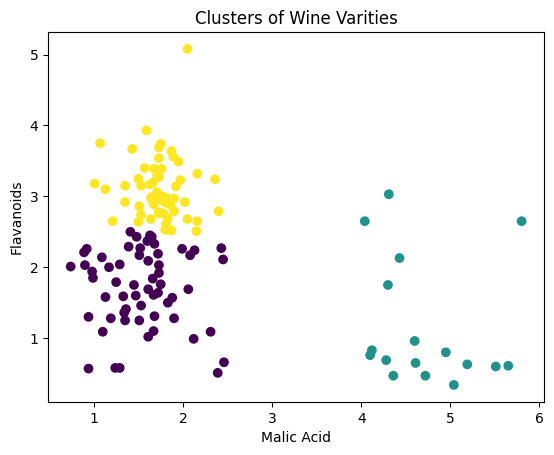

In [11]:
# Try the same thing with 3 clusters
hc = AgglomerativeClustering(n_clusters=3)
hc.fit(scaled_df)
# Save the cluster lables to the dataframe
df["cluster"] = hc.labels_
# Visualize the clusters
plt.scatter(df["malic_acid"], df["flavanoids"], c=df["cluster"])
plt.xlabel("Malic Acid")
plt.ylabel("Flavanoids")
plt.title("Clusters of Wine Varities")